In [167]:
# %%writefile Ind_RSRS.py

import sys
import os 
module_path = os.path.abspath(os.path.join('..')) 
if module_path not in sys.path: 
    sys.path.append(module_path)

import Ind_Model_Base

import numpy as np
import pandas as pd

import QUANTAXIS as QA

import matplotlib.pyplot as plt


import Analysis_Funs as af
import base.JuUnits as ju

# %load_ext autoreload
# %autoreload 2
# %aimport Analysis_Funs,Ind_Model_Base


class RSRS(Ind_Model_Base.Ind_Model):
    """阻力支撑相对强度Resistance Support Relative Strength
        high=alpha+beta*low+epsilon  epsilon~N（0，sigma）
    """
    optimum_param={'valid':False, 'main':'beta', 'desition_direct':1, 'freq':'d','neutralize':{'enable':True,'static_mv':False}}
    
    def __init__(self,data, frequence=QA.FREQUENCE.DAY):
        super().__init__(data, 'RSRS', frequence)
        self.renko_objs={}
        
        ### 正式使用时由实例设置为true来加速
#         self.set_ignore_sub_ind(False)
        

    def on_set_params_default(self):
        return {}
    
        
    def on_indicator_structuring(self, data):
        return self.excute_for_multicode(data, self.kernel, **self.pramas)
    
    def on_desition_structuring(self, data, ind_data):
        """
        """
#         JXSX = self.excute_for_multicode(self.ind_df,
#                                          lambda x: pd.DataFrame(af.feature_JXSX_timeline(x['direct']),
#                                          index=x.index,
#                                          columns=['feature_RENKO_JXSX']))

        
#         self.ind_df = pd.concat([self.ind_df, JXSX, ],axis=1)
        return None #pd.concat([JXSX,continuity],axis=1)
        
    def kernel(self,dataframe):
        def OLS(xx):
            xx_t = xx.T
            return af.get_LR_params_fast(xx_t[2].tolist(),xx_t[3].tolist())[0]
        
        if len(dataframe)<=60:
            return None
        
        res = ju.roll_multi_result(dataframe[['low','high']], OLS , 15, 1).T[0]

        
        res_pd = pd.DataFrame(res, index=dataframe.index,columns=['beta'])

        res_pd['std'] = res_pd.rolling(60).apply(lambda x:-1*np.abs((x[-1]-x.mean())/x.std() ))
#         res_pd['std'] = res_pd.rolling(60).apply(lambda x:(x[-1]-x.mean())/x.std() )
            
#         if not self.fast_mode:
#             self.renko_objs[dataframe.index.get_level_values(1)[0]] = renko_objc
        
        
        
#         if self.fast_mode:
#             return ret_indices.iloc[:,2:3]

        return res_pd

    def plot(self):
        if self.fast_mode:
            raise 'fast_mode is True,cant draw chart'
        
        


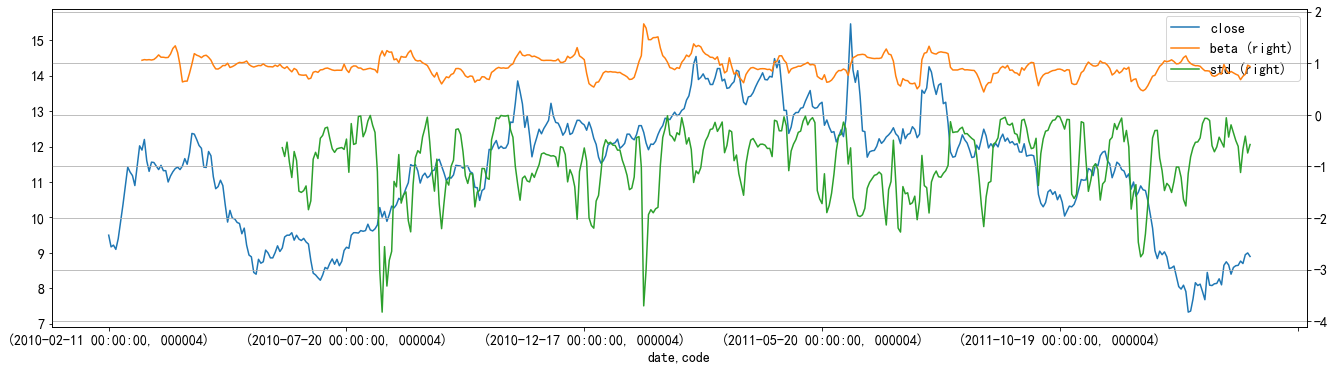

In [166]:
# import sys
# import os 
# module_path = os.path.abspath(os.path.join('..')) 
# if module_path not in sys.path: 
#     sys.path.append(module_path)
# import tools.Sample_Tools as smpl
# import Analysis_Funs as af
import base.JuUnits as ju
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

 

data = smpl.get_data(['000004'],start='2010-01-15',gap=504).data

# # 1、取前N日最高价与最低价序列。（N = 18）
# # 2、将两个序列进行OLS线性回归。
# # 3、将拟合后的β值作为当日RSRS斜率指标值。

def OLS(xx):
    xx_t = xx.T
    return af.get_LR_params_fast(xx_t[2].tolist(),xx_t[3].tolist())[0]

res = ju.roll_multi_result(data[['low','high']], OLS , 15, 1).T[0]
res_pd = pd.DataFrame(res, index=data.index,columns=['beta'])

res_pd['std'] = res_pd.rolling(60).apply(lambda x:np.abs((x[-1]-x.mean())/x.std() )*-1)

pd.concat([data['close'],res_pd],axis=1).plot(secondary_y=['beta','std'],figsize=(1620/72,420/72))
plt.grid()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


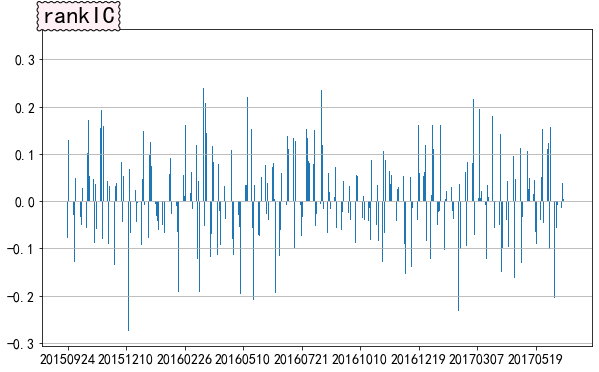

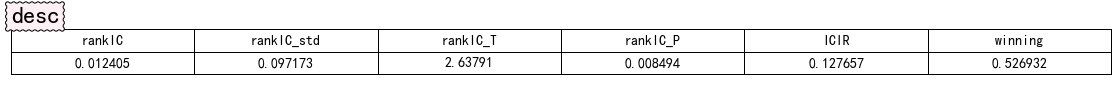

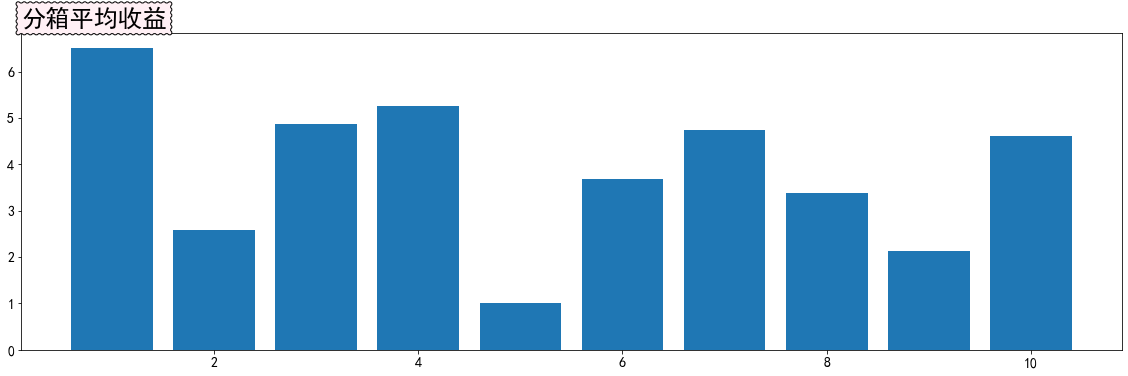

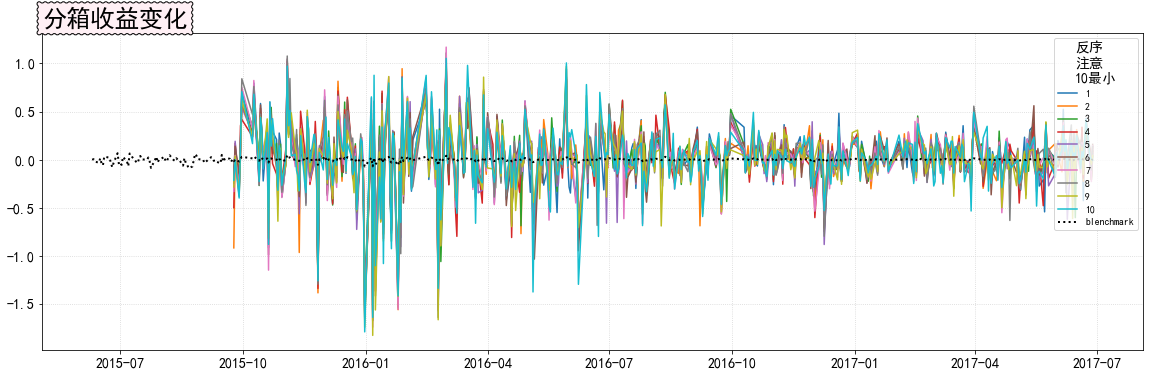

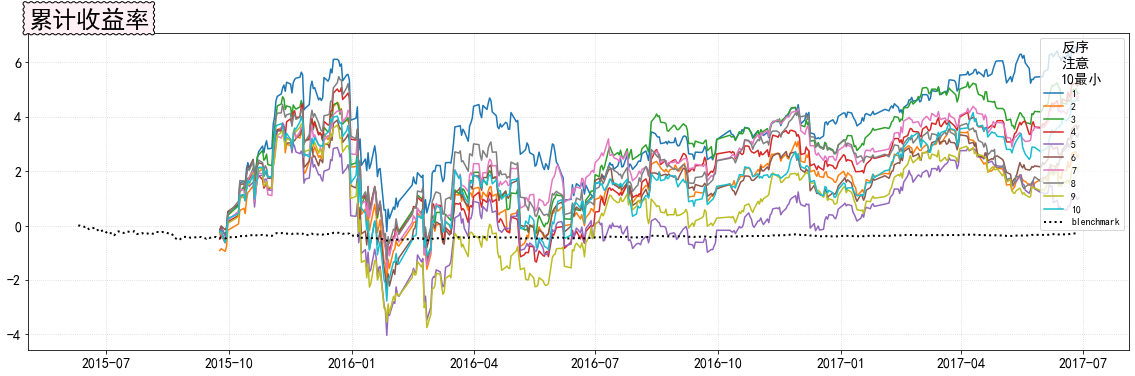

In [169]:
# import sys
# import os 
# module_path = os.path.abspath(os.path.join('..')) 
# if module_path not in sys.path: 
#     sys.path.append(module_path)
    
from tools.Test_Tools import FactorTest


%load_ext autoreload
%autoreload 1
%aimport tools.Test_Tools,ind.Ind_RENKO

# sample='沪深300'

test = FactorTest(RSRS, sample='沪深300', freq="d",end='2017-06-29',gap=500,only_main=True,neutralize={'enable':False,'static_mv':False},target_field='std')
test.process()
# test.process_multi()
test.plot()

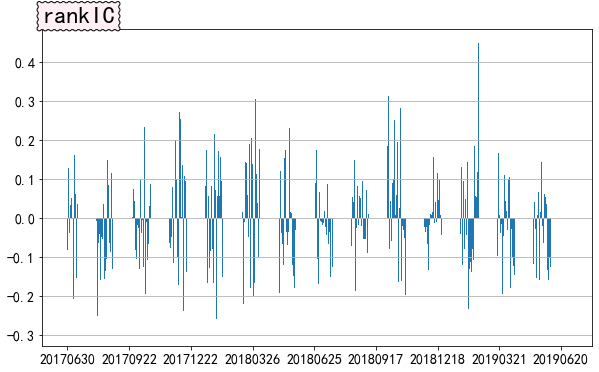

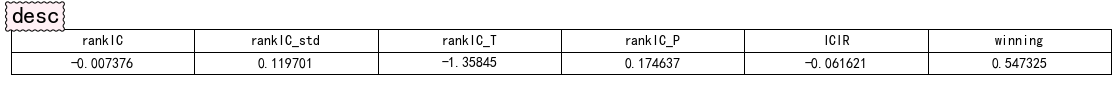

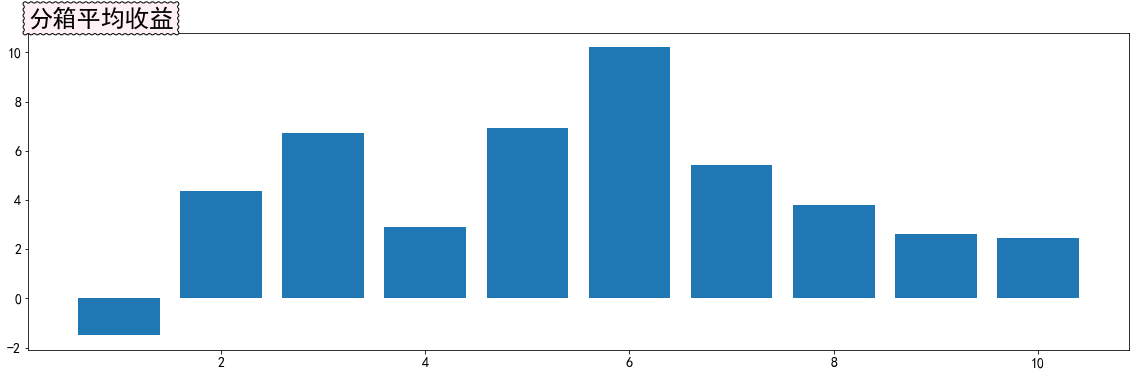

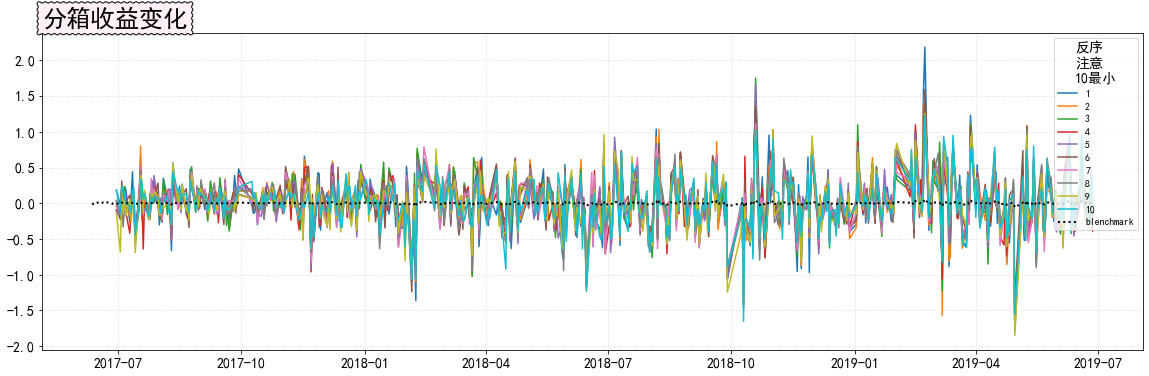

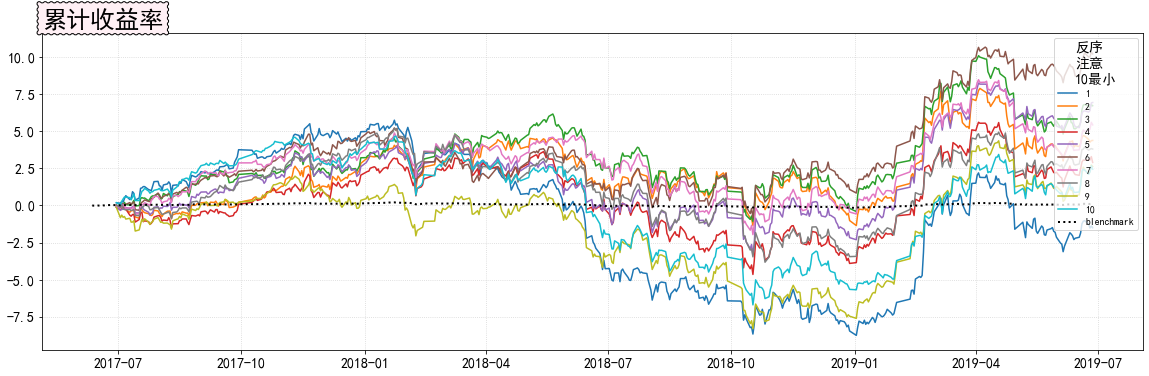

In [153]:
test = FactorTest(RSRS, sample='沪深300', freq="d",end='2019-06-29',gap=500,only_main=True,neutralize={'enable':False,'static_mv':False},target_field='std')
test.process()
# test.process_multi()
test.plot()